 # CUSTOMER CHURN PREDICTION PROJECT

# Data preprocessing

In [1]:
#Required libraries
import pandas as pd              
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
#os.chdir(r"D:/customer_churn/")

%matplotlib inline

In [2]:
dt=pd.read_csv('customer_churn_dataset.csv')

In [3]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
len(dt.axes[0]) #number of rows

7043

In [6]:
len(dt.axes[1]) #number of columns

21

In [7]:
dt.shape

(7043, 21)

In [8]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
dt.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#dt.info

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
dt.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [13]:
dt.isnull().sum() #finding the missing value in the dataset for the data cleaning purpose

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#dt.dropna(how="all") for removing missing value

# Data Evaluation

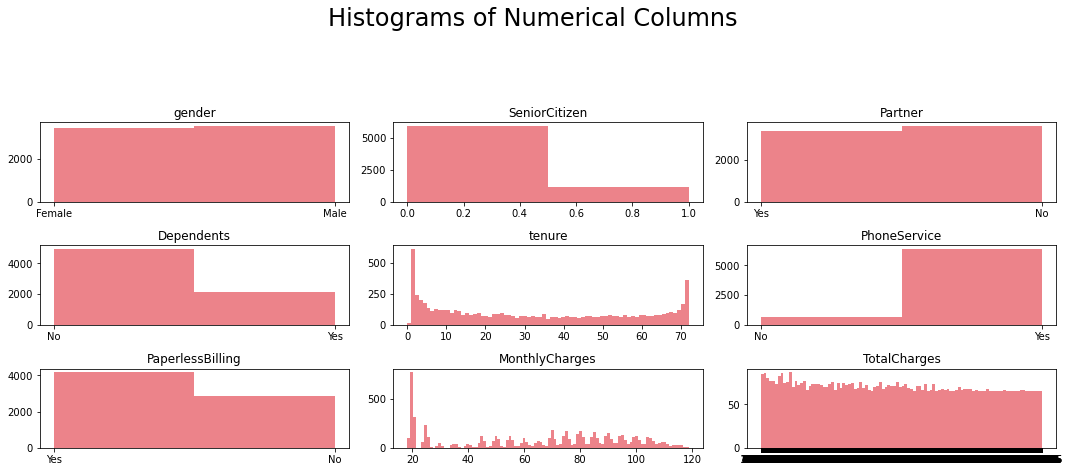

In [15]:
dataset2=dt[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]

#Histogram:

fig=plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns \n',horizontalalignment="center",fontstyle="normal",fontsize=24,fontfamily="sans-serif")

for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()

    f.set_title(dataset2.columns.values[i])

    vals=np.size(dataset2.iloc[:,i].unique())

    if vals>=100:
        vals=100

    plt.hist(dataset2.iloc[:,i],bins=vals,color='#ec838a')
plt.tight_layout(rect=[0,0.03,1,0.95])

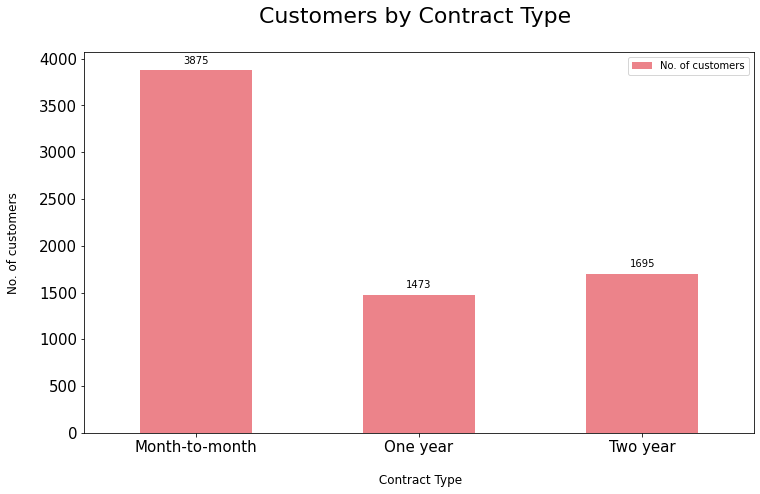

In [16]:
contract_split=dt[["customerID","Contract"]]
sectors=contract_split.groupby("Contract")
contract_split=pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'},inplace=True)

ax=contract_split[["No. of customers"]].plot.bar(title='Customer by Contract',legend=True, table=False,grid=False, subplots=False,figsize=(12,7), color='#ec838a',fontsize=15,stacked=False)

plt.ylabel('No. of customers\n',horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.title('Customers by Contract Type \n',horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right',fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels=np.array(contract_split[["No. of customers"]])

def add_value_labels(ax,spacing=5):
    for rect in ax.patches:
        y_value=rect.get_height()
        x_value=rect.get_x() + rect.get_width()/2
        space=spacing
        va='bottom'
        if y_value<0:
            space *=-1
            va='top'
        label="{:.0f}".format(y_value)
        ax.annotate(label,(x_value,y_value),xytext=(0,space),textcoords="offset points",ha='center',va=va)

add_value_labels(ax)

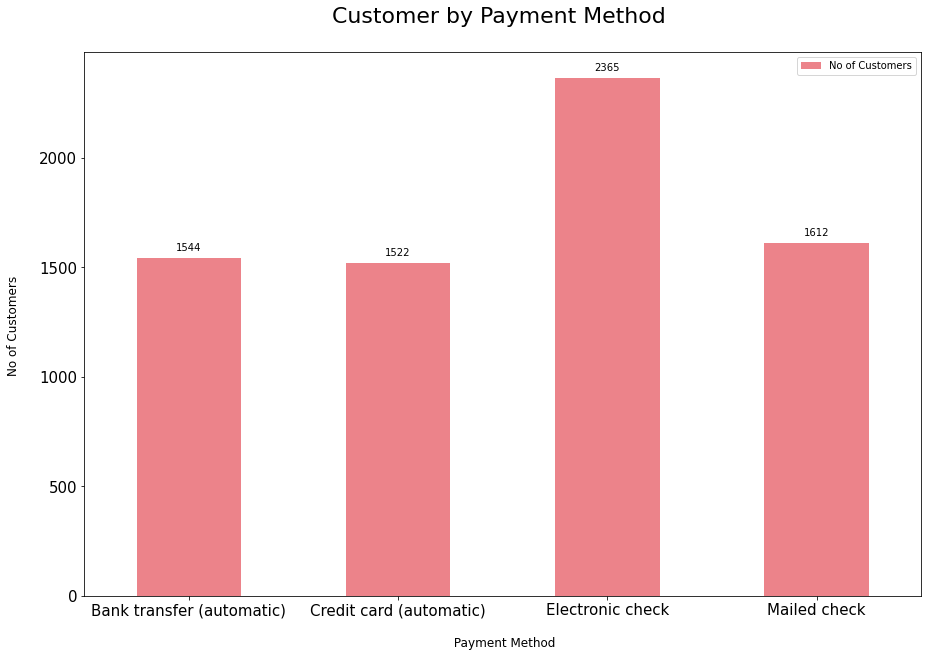

In [17]:
payment_method_split=dt[["customerID","PaymentMethod"]]
sectors=payment_method_split.groupby("PaymentMethod")
payment_method_split=pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No of Customers'},inplace=True)

ax=payment_method_split[["No of Customers"]].plot.bar(title='Customer by Payment Method',legend=True,table=False,grid=False,subplots=False,figsize=(15,10),color="#ec838a",fontsize=15,stacked=False)

plt.ylabel('No of Customers \n',horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.xlabel('\n Payment Method',horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.title('Customer by Payment Method \n',horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right',fontsize="medium")
plt.xticks(rotation=0,horizontalalignment="center")
plt.yticks(rotation=0,horizontalalignment="right")

x_labels=np.array(payment_method_split[["No of Customers"]])

def add_value_labels(ax,spacing=5):
    for rect in ax.patches:
        y_value=rect.get_height()
        x_value=rect.get_x() + rect.get_width()/2
        space=spacing
        va='bottom'
        if y_value<0:
            space *=-1
            va='top'
        label="{:.0f}".format(y_value)
        ax.annotate(label,(x_value,y_value),xytext=(0,space),textcoords="offset points",ha='center',va=va)

add_value_labels(ax)

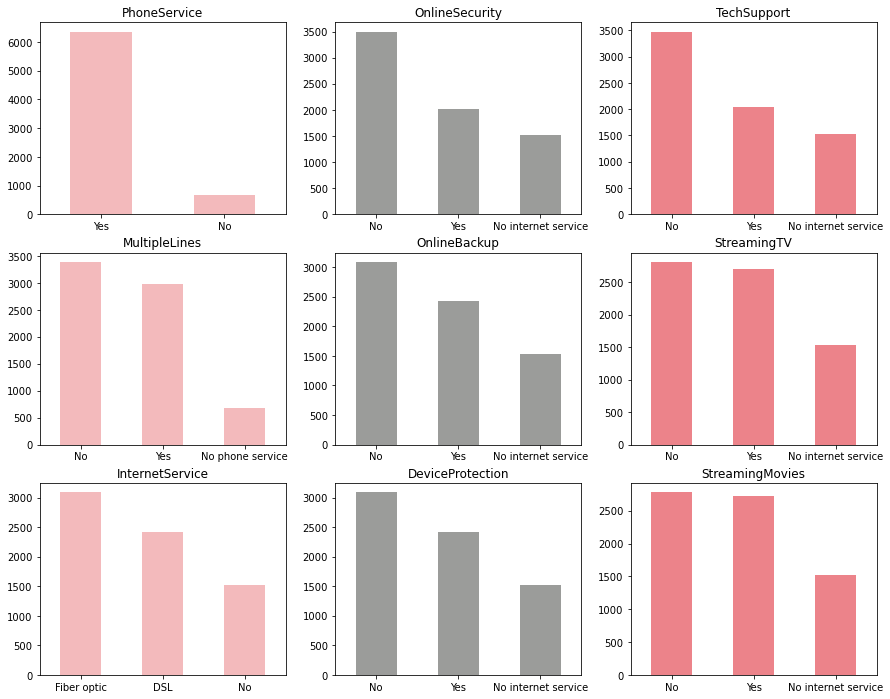

In [18]:
services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,12))

for i,item in enumerate(services):
    if i<3:
        ax=dt[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0,color='#f3babc')
    elif i>=3 and i<6:
        ax=dt[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0,color='#9b9c9a')
    elif i<9:
        ax=dt[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0,color='#ec838a')
        
    ax.set_title(item)

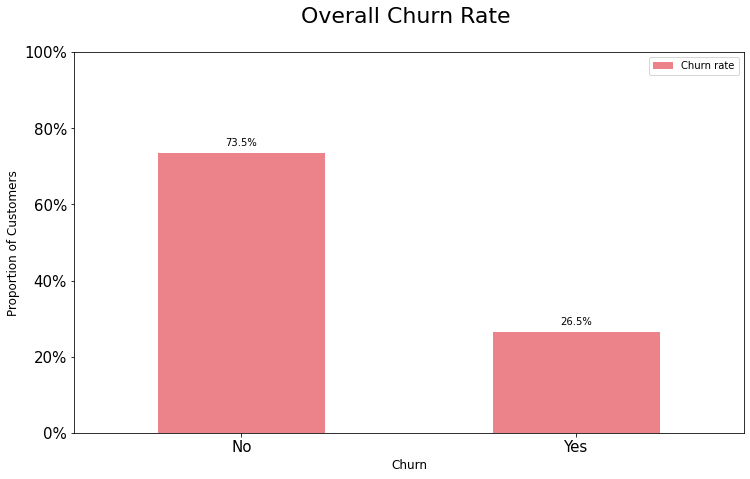

In [19]:
import matplotlib.ticker as mtick
churn_rate=dt[["Churn","customerID"]]

sectors=churn_rate.groupby("Churn")
churn_rate=pd.DataFrame(sectors["customerID"].count())

churn_rate["Churn rate"]=(churn_rate["customerID"]/sum(churn_rate["customerID"]))*100

ax=churn_rate[["Churn rate"]].plot.bar(title='Overall Churn Rate',legend=True,table=False,grid=False,subplots=False,figsize=(12,7),color='#ec838a',fontsize=15,stacked=False,ylim=(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right',fontsize="medium")
plt.xticks(rotation=0,horizontalalignment="center")
plt.yticks(rotation=0,horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

x_labels=np.array(churn_rate[["customerID"]])

def add_value_labels(ax,spacing=5):
    for rect in ax.patches:
        y_value=rect.get_height()
        x_value=rect.get_x()+ rect.get_width()/2
        space=spacing
        va='bottom'
        if y_value<0:
            space *=-1
            va='top'
        label="{:.1f}%".format(y_value)
        ax.annotate(label,(x_value,y_value),xytext=(0,space),textcoords="offset points",ha='center',va=va)

add_value_labels(ax)
ax.autoscale(enable=False,axis='both',tight=False)

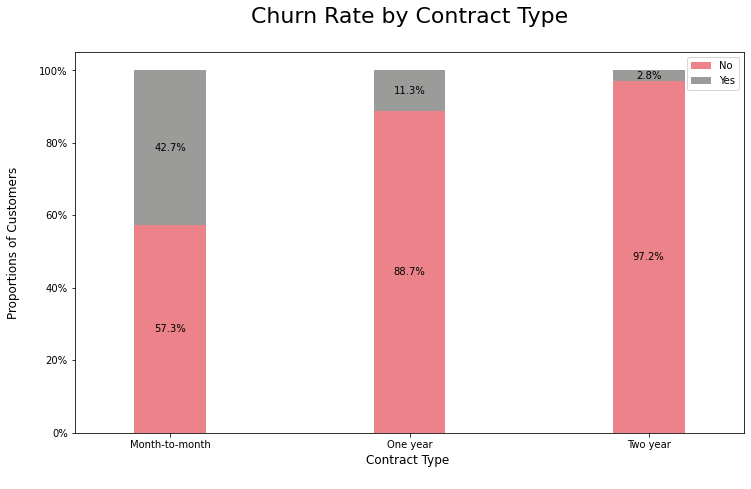

In [20]:
import matplotlib.ticker as mtick
contract_churn=dt.groupby(["Contract","Churn"]).size().unstack()
contract_churn.rename(columns={0:'No',1:'Yes'},inplace=True)
colors=["#ec838a","#9b9c9a"]

ax=(contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind="bar",width=0.3,stacked=True,rot=0,figsize=(12,7),color=colors)

plt.ylabel("Proportions of Customers\n",horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.xlabel("Contract Type \n",horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.title("Churn Rate by Contract Type\n",horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

plt.legend(loc="upper right",fontsize="medium")
plt.xticks(rotation=0,horizontalalignment="center")
plt.yticks(rotation=0,horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.1f}%'.format(height),horizontalalignment="center",verticalalignment="center")
    
ax.autoscale(enable=False,axis='both',tight=False)

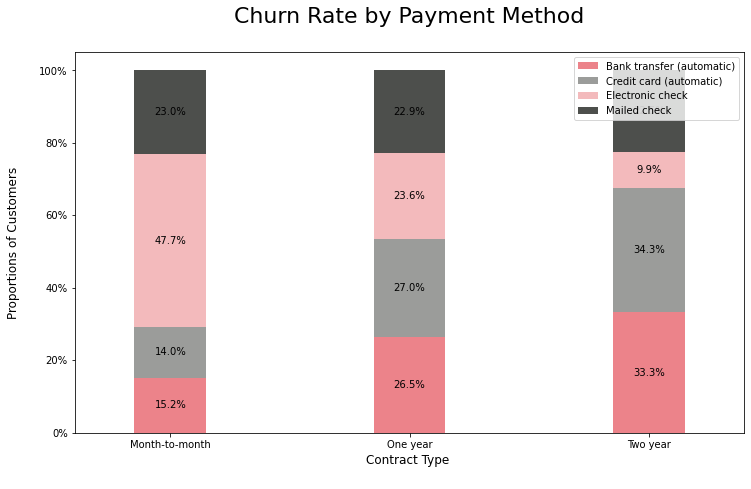

In [21]:
import matplotlib.ticker as mtick
contract_churn=dt.groupby(['Contract','PaymentMethod']).size().unstack()
contract_churn.rename(columns={0:'No',1:'Yes'},inplace=True)
colors=["#ec838a","#9b9c9a","#f3babc","#4d4f4c"]

ax=(contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind="bar",width=0.3,stacked=True,rot=0,figsize=(12,7),color=colors)

plt.ylabel("Proportions of Customers\n",horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.xlabel("Contract Type \n",horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")
plt.title("Churn Rate by Payment Method\n",horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")


plt.legend(loc='upper right',fontsize="medium")
plt.xticks(rotation=0,horizontalalignment="center")
plt.yticks(rotation=0,horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.1f}%'.format(height),horizontalalignment="center",verticalalignment="center")
    
ax.autoscale(enable=False,axis='both',tight=False)